<a href="https://www.suss.edu.sg/">
   <img src = "https://www.suss.edu.sg/images/default-source/default-album/logo-with-tagline.png" width =200> 

# <center>ANL252 Python for Data Analytics-Tutor-Marked Assignment</center>
# <center>July 2022 Presentation</center>

###  <center>SUSS PI No.: K2170805 <center>
### <center>Name: Tan Wenying Audrey <center>
    
### <center>Tutorial Group: T09 <center>    
### <center>Instructor's Name: Dr Munish Kumar <center>    
    
### <center>Submission Date.: 14 August 2022 <center>

## Question 1b

### Libraries

In [1]:
#import pandas
import pandas as pd

#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#import seaborn
import seaborn as sns

#import ast
import ast

#import datetime
from datetime import date, time, datetime

#import numpy
import numpy as np

### Import Excel

In [2]:
#Read excel
df = pd.read_csv('TMA_Data.csv')

### Display first 5 rows of dataframe and check type of data

In [3]:
#Display the data in the first 5 rows of dataframe
df.head()

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.4,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.6,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.4,4,14
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.1,4,20
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.0,4,2


In [4]:
#Print type function to check type
print(df.dtypes)

ID                    int64
Staff                object
BirthYear            object
Gender               object
Marital              object
Citizenship          object
Minority             object
JoinDate             object
LeftDate             object
Unit                 object
Salary                int64
PerformanceScore     object
Survey              float64
Satisfaction          int64
Absence               int64
dtype: object


### Preparing data for chart 1 on boxplot

In [5]:
#Extract all the rows with Gender = F or female
contain_values = df[df['Gender'].str.contains('F')]

In [6]:
#For these rows with Gender =F, filter out the Salary
contain_values = contain_values.filter(['Salary'])
#Rename the new column
contain_values=contain_values.rename(columns={'Salary':'Salary_of_Females'})

In [7]:
#Extract all the rows with Gender = M or Male
contain_values2 = df[df['Gender'].str.contains('M')]

In [8]:
#For these rows with Gender =M, filter out the Salary
contain_values2 = contain_values2.filter(['Salary'])
#Rename the new column
contain_values2=contain_values2.rename(columns={'Salary':'Salary_of_Males'})

### Summarised table

In [9]:
#create boxplot summarised table
boxplot_table = pd.concat([contain_values, contain_values2], axis=1)
#Print out the first and last five observations in the dataframe
display(boxplot_table)

,Salary_of_Females,Salary_of_Males
0,46335.0,NaN
1,66825.0,NaN
2,60446.0,NaN
4,50825.0,NaN
5,58062.0,NaN
...,...,...
241,NaN,88527.0
242,NaN,56294.0
244,NaN,50373.0
246,NaN,90100.0


### Chart 1- Boxplot

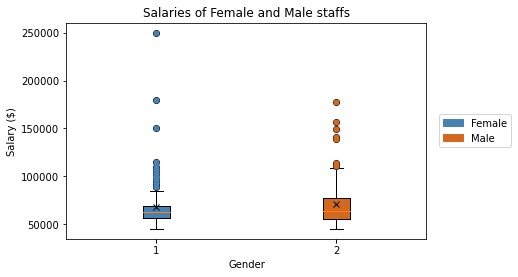

In [10]:
#Combining data of salaries from M and F into numpy array
data = np.array([contain_values, contain_values2], dtype=object)

#Set the size of the plot    
fig = plt.figure(figsize =(5, 3))
 
#Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
#Creating plot
bp = ax.boxplot(data)

#X and Y Labels
plt.xlabel('Gender')
plt.ylabel('Salary ($)')

#Adding title
plt.title("Salaries of Female and Male staffs")

#Adding ticks
plt.xticks([1, 2], ['Female', 'Male'])

#Plot the boxplot
box = plt.boxplot(data, #array to be plotted
                  patch_artist=True, #fill with color
                  flierprops={'markeredgecolor': 'None'}, #no marker edger for outliers
                  showmeans=True, #show the mean
                  meanprops={"marker":"x","markerfacecolor":"black", "markeredgecolor":"black"}) #set the marker type and colour of the mean

#Fill the outliers with two colours
cols = ['steelblue', 'chocolate']
for f, fc in zip(box['fliers'], cols):
    f.set_markerfacecolor(fc)

#Fill the boxplot with two colours
colors = ['steelblue', 'chocolate']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)        
        
#set legend
orange_patch=mpatches.Patch(color='steelblue',label="Female") #Set colour for Females in legend
blue_patch=mpatches.Patch(color='chocolate',label="Male") #Set colour for Males in legend
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, handles=[orange_patch, blue_patch])

#show plot
plt.show()

### Preparing data for chart 2 on scatterplot

In [11]:
#Extract last two digits of BirthYear
df['Year'] = df['BirthYear'].str[-2:]

In [12]:
#Create a new column starting with 19 to show the year starting from 1900s
df['frontyear'] = 19

In [13]:
#Create a new column of dates
df["fullyear"] =  df["frontyear"].astype(str)+ df["Year"].astype(str)

In [14]:
#Create a new column for this year of 2022
df["thisyear"] =  2022

In [15]:
#Get the age by taking this year substracted by the DOB
df["Age"] = df["thisyear"]- df["fullyear"].astype(int)
df.head()

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence,Year,frontyear,fullyear,thisyear,Age
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.4,5,15,86,19,1986,2022,36
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.6,3,20,86,19,1986,2022,36
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.4,4,14,85,19,1985,2022,37
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.1,4,20,84,19,1984,2022,38
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.0,4,2,89,19,1989,2022,33


### Summarised table

In [16]:
#Create scatterplot summarised table
scatterplot_table= df[["Age","Salary","Unit"]]
#Display the first and last five observations of the dataframe
display(scatterplot_table)

,Age,Salary,Unit
0,36,46335,Manufacturing
1,36,66825,Manufacturing
2,37,60446,Manufacturing
3,38,93046,Admin
4,33,50825,Manufacturing
...,...,...,...
245,41,89883,IT
246,35,90100,IT
247,52,138888,IT
248,42,50274,Manufacturing


In [17]:
#Insert column headers named 'Admin ','C-Level', 'Engineering', 'IT', 'Manufacturing', 'Sales' into the respective columns indicated by the index
#Use loc attribute to return the salary when the data in each row of the Unit column matches each header 
scatterplot_table.insert(3, 'Admin ', scatterplot_table.loc[scatterplot_table.Unit=='Admin ','Salary'])
scatterplot_table.insert(4, 'C-Level', scatterplot_table.loc[scatterplot_table.Unit=='C-Level','Salary'])
scatterplot_table.insert(5, 'Engineering', scatterplot_table.loc[scatterplot_table.Unit=='Engineering','Salary'])
scatterplot_table.insert(6,'IT', scatterplot_table.loc[scatterplot_table.Unit=='IT','Salary'])
scatterplot_table.insert(7,'Manufacturing', scatterplot_table.loc[scatterplot_table.Unit=='Manufacturing','Salary'])
scatterplot_table.insert(8,'Sales', scatterplot_table.loc[scatterplot_table.Unit=='Sales','Salary'])
display(scatterplot_table)

,Age,Salary,Unit,Admin,C-Level,Engineering,IT,Manufacturing,Sales
0,36,46335,Manufacturing,NaN,NaN,NaN,NaN,46335.0,NaN
1,36,66825,Manufacturing,NaN,NaN,NaN,NaN,66825.0,NaN
2,37,60446,Manufacturing,NaN,NaN,NaN,NaN,60446.0,NaN
3,38,93046,Admin,93046.0,NaN,NaN,NaN,NaN,NaN
4,33,50825,Manufacturing,NaN,NaN,NaN,NaN,50825.0,NaN
...,...,...,...,...,...,...,...,...,...
245,41,89883,IT,NaN,NaN,NaN,89883.0,NaN,NaN
246,35,90100,IT,NaN,NaN,NaN,90100.0,NaN,NaN
247,52,138888,IT,NaN,NaN,NaN,138888.0,NaN,NaN
248,42,50274,Manufacturing,NaN,NaN,NaN,NaN,50274.0,NaN


### Chart 2-Scatterplot

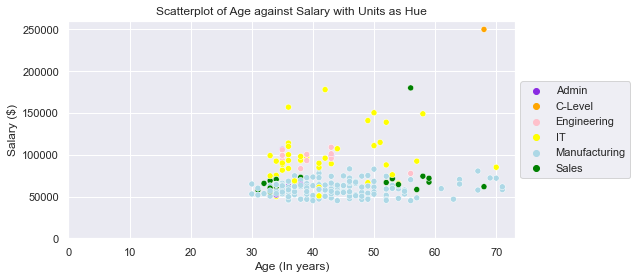

In [18]:
#Plot scatterplot with Seaborn

#To set the colours per Unit
colour_dict = dict({'Admin ':'blueviolet',
                  'C-Level':'orange',
                  'Engineering': 'pink',
                  'IT': 'yellow',
                   'Manufacturing': 'lightblue',
                  'Sales': 'green'})

#Set the order in the legend
orders=['Admin ','C-Level','Engineering', 'IT', 'Manufacturing', 'Sales']

#To set the side of the scatterplot
sns.set(rc={"figure.figsize":(8, 4)})
    
#To display the scatterplot
g =sns.scatterplot(x="Age", y="Salary",
              hue="Unit",
              data=df,
              palette=colour_dict, 
              hue_order=orders)

#Rename axis
plt.xlabel('Age (In years)')
plt.ylabel('Salary ($)')

#To start the x and y axis at point 0
plt.xlim(0)
plt.ylim(0)

#To set the title 
plt.title('Scatterplot of Age against Salary with Units as Hue')

#To set the legend location of scatterplot
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


## Question 1c

In [19]:
#Count the number of missing values in each column
df.isnull().sum(axis=0)

ID                    0
Staff                 0
BirthYear             0
Gender                0
Marital               0
Citizenship           0
Minority              0
JoinDate              0
LeftDate            165
Unit                  0
Salary                0
PerformanceScore      0
Survey                0
Satisfaction          0
Absence               0
Year                  0
frontyear             0
fullyear              0
thisyear              0
Age                   0
dtype: int64

In [20]:
#Create a new column with the filled empty rows in the column LeftDate with 1 May 2022.
df['LeftDatenew'] = df['LeftDate'].fillna(value=pd.to_datetime('05-01-2022')) 
df.head()

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,...,PerformanceScore,Survey,Satisfaction,Absence,Year,frontyear,fullyear,thisyear,Age,LeftDatenew
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,...,Meet,3.4,5,15,86,19,1986,2022,36,2022-05-01 00:00:00
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,...,Meet,4.6,3,20,86,19,1986,2022,36,2022-05-01 00:00:00
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,...,Meet,3.4,4,14,85,19,1985,2022,37,2022-05-01 00:00:00
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,...,Meet,4.1,4,20,84,19,1984,2022,38,2022-05-01 00:00:00
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,...,Meet,5.0,4,2,89,19,1989,2022,33,9/6/2020


In [21]:
#Convert the two columns to datetime format
df['JoinDatenew'] = pd.to_datetime(df['JoinDate'])
df['LeftDatenew'] = pd.to_datetime(df['LeftDatenew'])

#Calculate the length of service of each staff
df['length_of_service'] = df['LeftDatenew'].dt.year - df['JoinDatenew'].dt.year
df.head(5)

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,...,Satisfaction,Absence,Year,frontyear,fullyear,thisyear,Age,LeftDatenew,JoinDatenew,length_of_service
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,...,5,15,86,19,1986,2022,36,2022-05-01,2012-04-02,10
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,...,3,20,86,19,1986,2022,36,2022-05-01,2014-05-12,8
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,...,4,14,85,19,1985,2022,37,2022-05-01,2014-09-29,8
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,...,4,20,84,19,1984,2022,38,2022-05-01,2016-01-05,6
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,...,4,2,89,19,1989,2022,33,2020-09-06,2011-07-11,9


In [22]:
#Calculate the mean, minimum and maximum value from the length of service and round the data to one decimal place
result = round(df.agg({'length_of_service': ['mean', 'min', 'max']}),1)
  
print("Mean, min, and max values of the 250 staffs' length of service:")
print(result)

Mean, min, and max values of the 250 staffs' length of service:
      length_of_service
mean                6.8
min                 0.0
max                16.0


## Question 1d

In [26]:
#Create a loop for user input on the full name of the staff
while True:
    xyz = input('\nPlease enter the full name of person or type "exit" to exit this query: ')
    Staff_count=df['Staff'].str.fullmatch(xyz).sum() # When the staff's full name keyed in by user is a full match, then the output is integer of more than 0, else it is 0.
    if xyz == 'exit': #If user keys in "exit" the query will end
        print("You have successfully exited the query")
        break     
    elif Staff_count!= 0: #If there are more than 0 matches on the full name of the staff, this will be printed.
        print('The person you are checking called ' + xyz + ' was/is a staff of the organization.')
    elif Staff_count== 0: #If there are no matches on the full name of the staff 
        if xyz.isalpha(): #If there are no matches on the full name of the staff and the user input are letters, this will be printed. 
            print('The person you are checking called ' + xyz + ' is not a staff of the organization.') 
        elif type((ast.literal_eval(xyz))) is float: #If there are no matches on the full name of the staff and the user input is float, this will be printed. 
            print('This is a float, please enter the full name of person')
        elif type((ast.literal_eval(xyz))) is int: #If there are no matches on the full name of the staff and the user input is integer, this will be printed.
            print('This is an integer, please enter the full name of person')



Please enter the full name of person or type "exit" to exit this query: 


SyntaxError: unexpected EOF while parsing (<unknown>, line 0)


# <center>The End<center>